# Interactive

In [1]:
import numpy as np
import scipy
from ipywidgets import widgets

from smpl import animation, plot

In [13]:
def fta(a, u=4.0):
    plot.function(lambda x: x**u + a, xmin=0, xmax=5, init=True, tight=False)


print("Double click play for speedup.")
animation.interactive(
    fta,
    widgets.Play(
        value=0,
        min=0,
        max=10,
        step=1,
        interval=500,
        description="Press play",
        disabled=False,
    ),
    widgets.FloatSlider(value=1, min=0, max=1, step=0.1, description="u"),
    prerender=True,
)

Double click play for speedup.


Output(layout=Layout(border_bottom='0px solid black', border_left='0px solid black', border_right='0px solid b…

In [3]:
def fta(n=1.0, u=4.0):
    plot.function(
        lambda x: np.exp(n * np.log(x) - x) / u,
        xmin=0.1,
        xmax=100,
        tight=False,
        init=False,
    )


animation.interactive(
    fta,
    widgets.IntSlider(value=1, min=1, max=10, description="n"),
    widgets.IntSlider(value=1, min=1, max=10, description="u"),
    prerender=True,
)

Output(layout=Layout(border_bottom='0px solid black', border_left='0px solid black', border_right='0px solid b…

Output(layout=Layout(border_bottom='0px solid black', border_left='0px solid black', border_right='0px solid b…

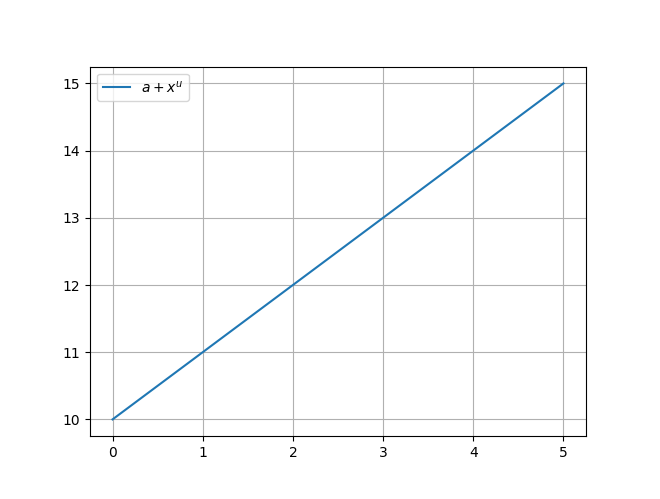

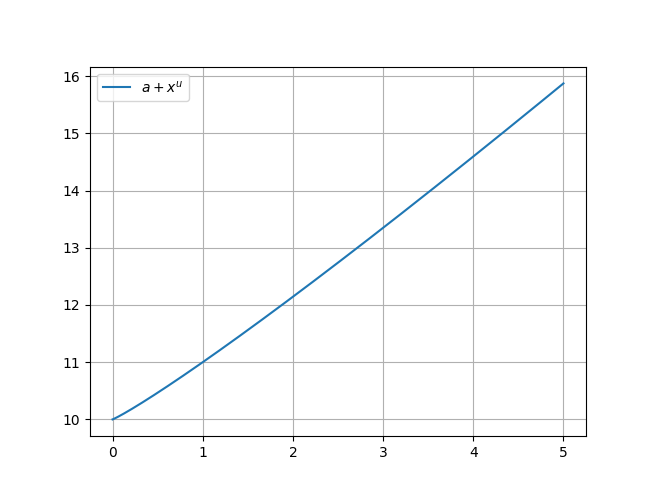

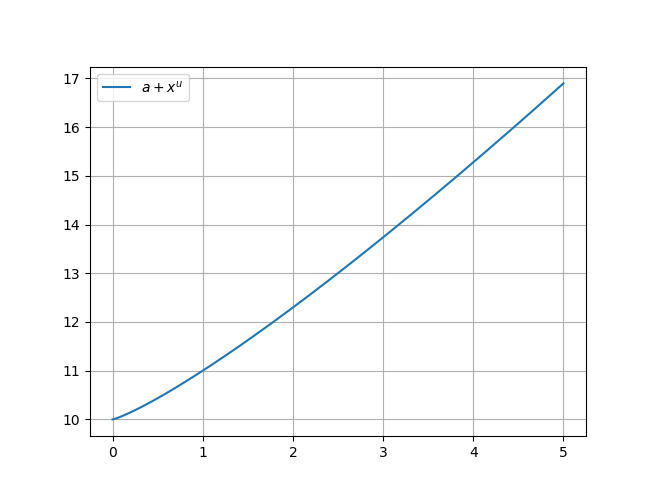

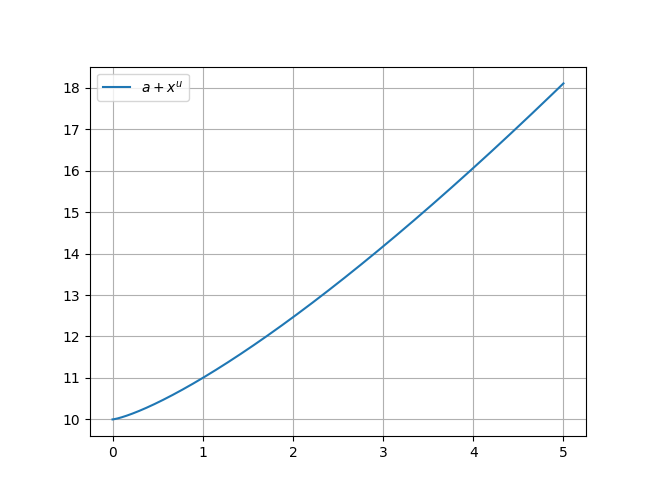

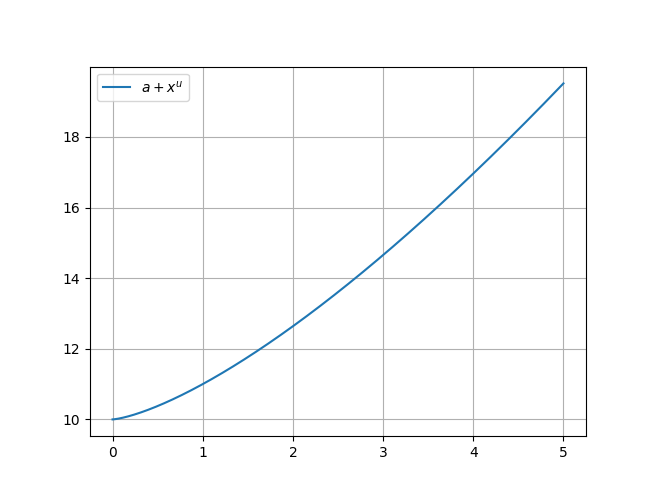

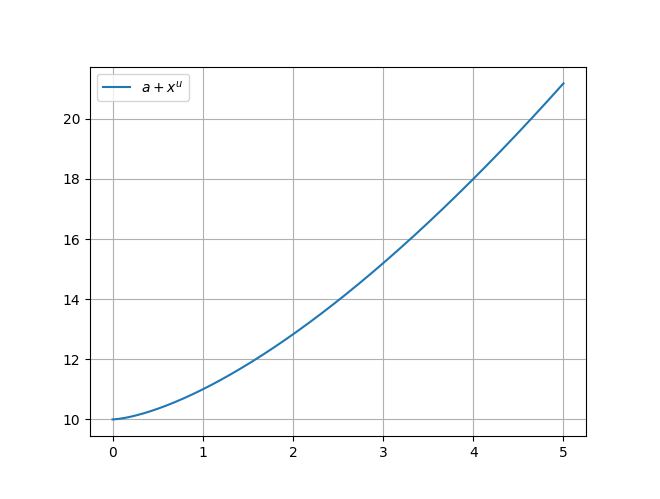

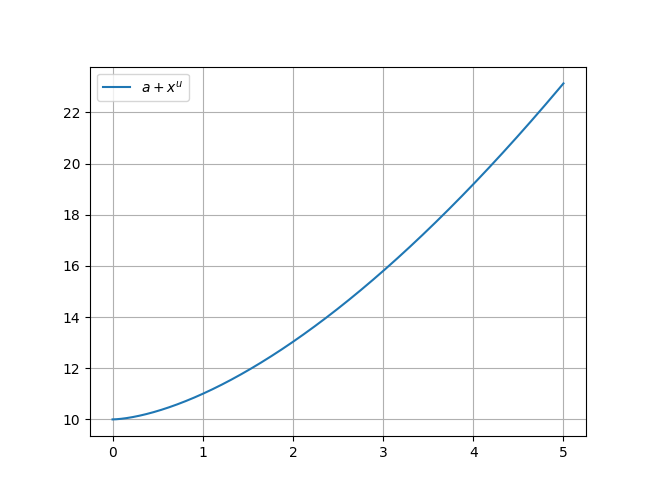

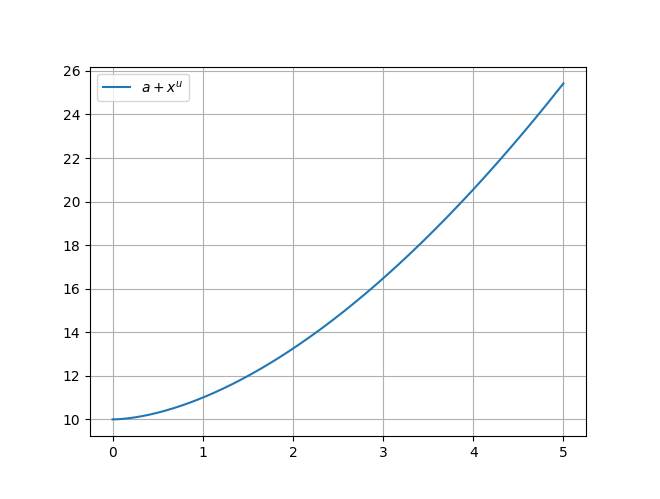

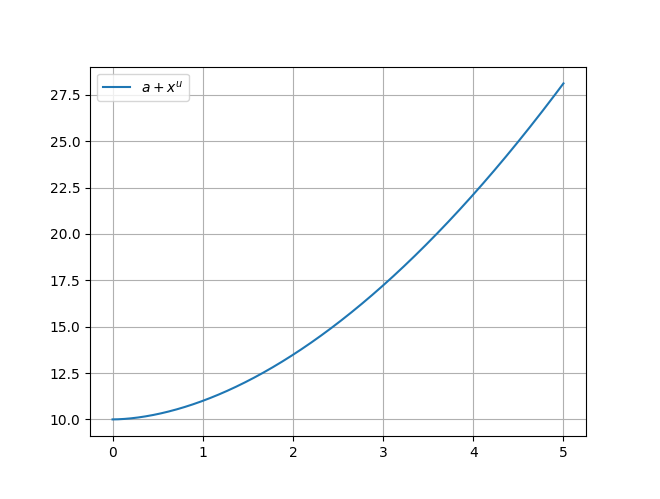

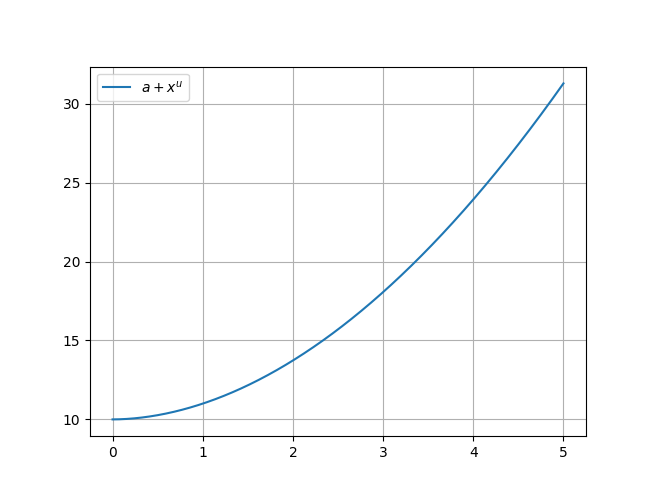

In [14]:
def fta(u=4.0):
    animation.clear()
    for a in np.linspace(0, 10, 10):
        plot.function(lambda x: x**u + a, xmin=0, xmax=5, init=True, tight=False)
        animation.frame()

    ani = animation.animate(interval=10, blit=True)
    display(ani.widget_gif())


animation.interactive(
    fta,
    widgets.FloatSlider(value=1, min=1, max=2, step=0.1, description="u"),
    prerender=True,
    auto_png=False,
)

In [9]:
# Approximate factorial by gamma
def fact(n):
    return scipy.special.gamma(n + 1)

In [10]:
# %matplotlib notebook
# plt.ioff()
# import ipywidgets
def fta(n=1.0):
    plot.function(
        lambda x: np.exp(n * np.log(x) - x), xmin=0.1, xmax=100, tight=False, init=False
    )
    plot.function(
        lambda x: np.exp(n * np.log(n) - n - (x - n) ** 2 / 2 / n),
        xmin=0.1,
        xmax=100,
        tight=False,
        init=False,
    )
    fac = fact( n)
    sti = np.sqrt(2 * np.pi * n) * n**n * np.exp(-n)
    # print("FAKULTÄT("+str(n)+") = " + str(fac))
    # print("STIRLING("+str(n)+") = " +  str(sti))
    # print("REL-DIFF(" + str(n)+") = "+ str((sti-fac)/fac*100) + "%")


animation.interactive(
    fta, widgets.IntSlider(min=1, max=130, step=1, value=1, description="n")
)

Output(layout=Layout(border_bottom='0px solid black', border_left='0px solid black', border_right='0px solid b…

/home/apn/git/smpl/smpl/plot.py:939: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=kwargs["lpos"])


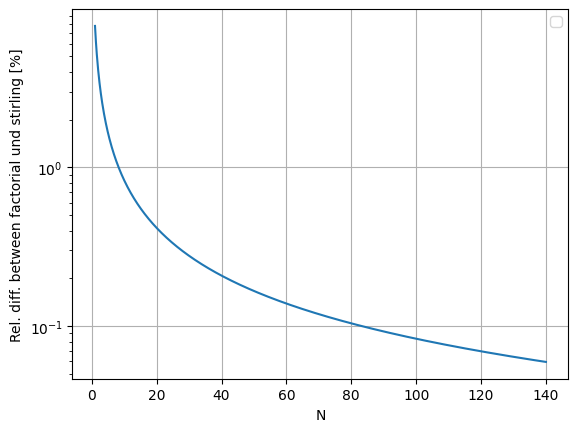

In [11]:



plot.function(
    lambda n: (fact(n) - np.sqrt(2 * np.pi * n) * n**n * np.exp(-n)) / fact(n) * 100,
    xmin=1,
    xmax=140,
    xlabel="N",
    ylabel="Rel. diff. between factorial und stirling [%]",
    label="",
    logy=True,
    tight=False,
    init=True,
)